# Estudo prático - LSTM

#### Sabrina Otoni da Silva - 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
np.random.seed(7)

#Carrega o dataset
dataframe = read_csv('https://telescopeinstorage.blob.core.windows.net/datasets/Eletrical_Production.csv', index_col = 'DATE', engine='python')
dataframe.head(150)

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
1951-02-01,10.2817
1951-03-01,10.2817
1951-04-01,10.2559


In [4]:
dataframe.tail(150)

,IPG2211A2N
DATE,
2006-11-01,92.5922
2006-12-01,103.3658
2007-01-01,112.3854
2007-02-01,112.1298
2007-03-01,99.4690
...,...
2018-12-01,112.9498
2019-01-01,123.7679
2019-02-01,113.0855


<Axes: xlabel='DATE'>

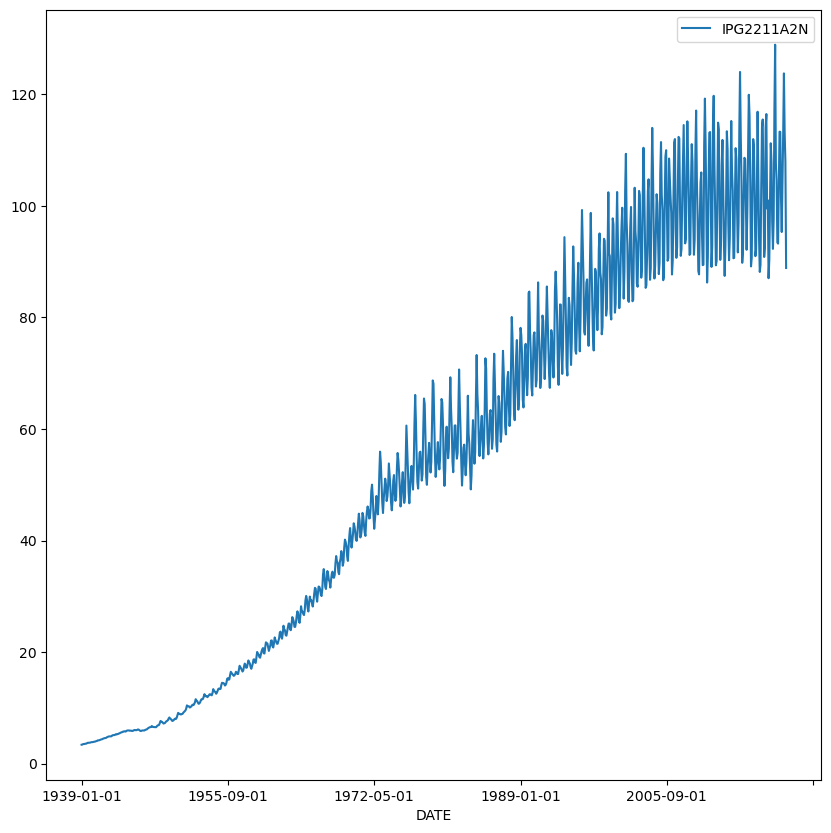

In [5]:
dataframe.plot(figsize=(10,10))

In [6]:
dataframeFilter =  dataframe.loc['1980-01-01':]

In [7]:
dataframeFilter.head()

,IPG2211A2N
DATE,
1980-01-01,65.3810
1980-02-01,64.7721
1980-03-01,60.8807
1980-04-01,53.1114
1980-05-01,49.7992


In [8]:
dataframeFilter.tail()

,IPG2211A2N
DATE,
2018-12-01,112.9498
2019-01-01,123.7679
2019-02-01,113.0855
2019-03-01,108.0490
2019-04-01,88.8719


<Axes: xlabel='DATE'>

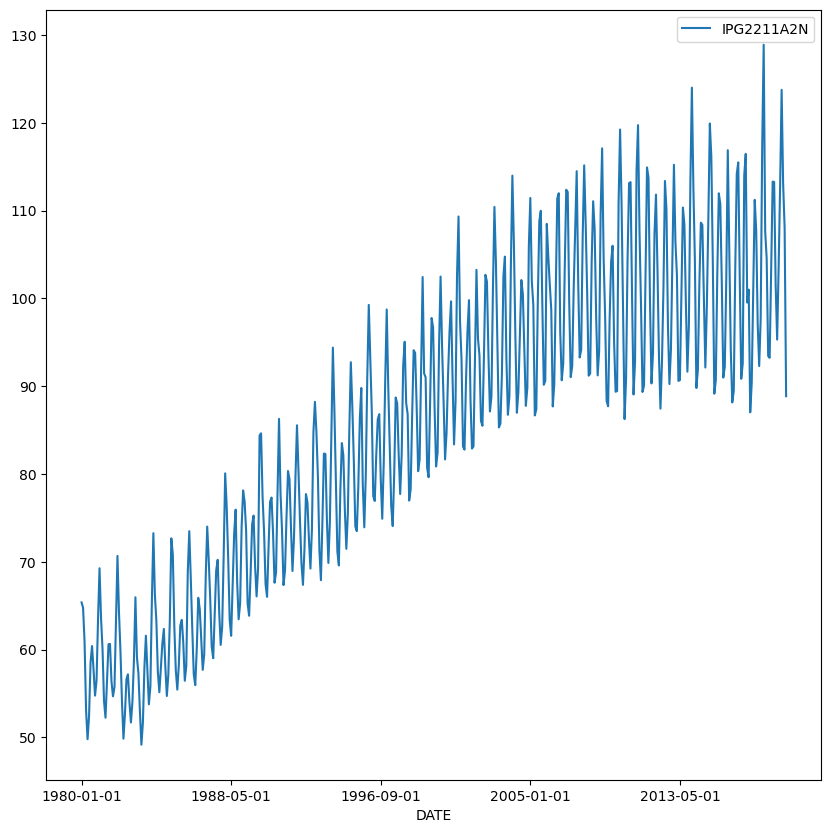

In [9]:
dataframeFilter.plot(figsize=(10,10))

In [10]:
X = dataframeFilter[['IPG2211A2N']].values
X = X.astype('float32')

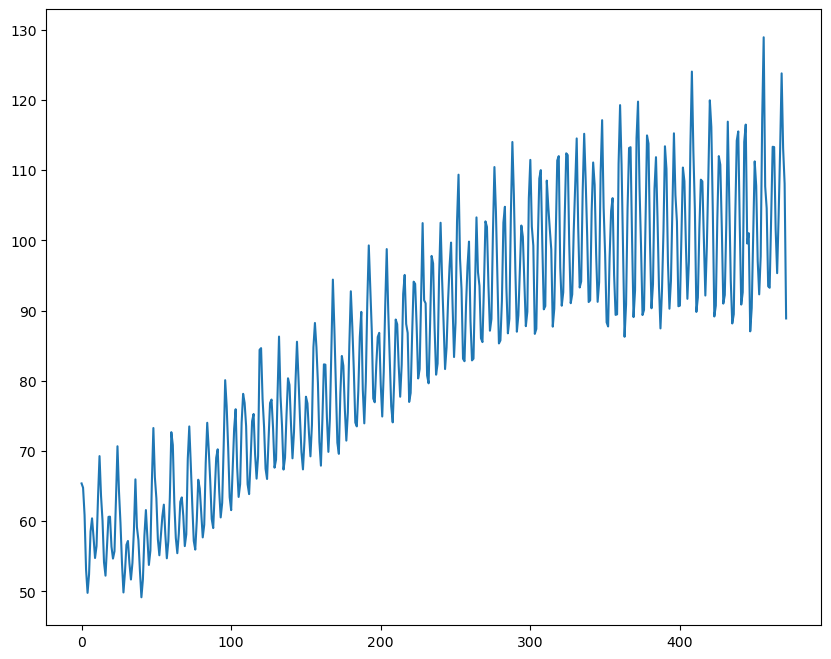

In [11]:
plt.figure(figsize=(10,8))
plt.plot(X)

In [12]:
#Normaliza o dataset
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size

train = X[0:train_size,:]
test =  X[train_size:len(X),:]

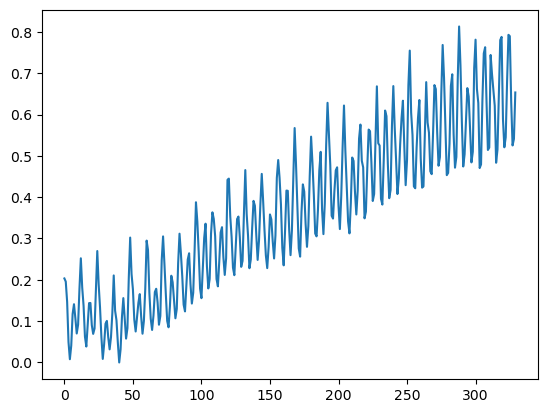

In [14]:
plt.plot(train)

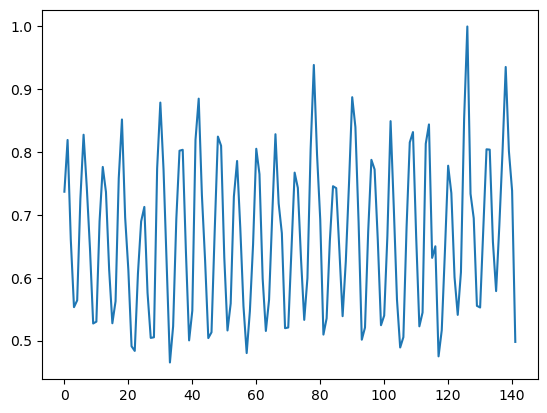

In [15]:
plt.plot(test)

In [16]:
# quantidade de atrasos
look_back = 3

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


In [17]:
X_train

array([[0.20329857, 0.19566226, 0.14685893],
       [0.19566226, 0.14685893, 0.04942161],
       [0.14685893, 0.04942161, 0.00788224],
       [0.04942161, 0.00788224, 0.0408358 ],
       [0.00788224, 0.0408358 , 0.1173203 ],
       [0.0408358 , 0.1173203 , 0.140962  ],
       [0.1173203 , 0.140962  , 0.1074453 ],
       [0.140962  , 0.1074453 , 0.07014364],
       [0.1074453 , 0.07014364, 0.09143758],
       [0.07014364, 0.09143758, 0.17897224],
       [0.09143758, 0.17897224, 0.25209063],
       [0.17897224, 0.25209063, 0.18139023],
       [0.25209063, 0.18139023, 0.13710177],
       [0.18139023, 0.13710177, 0.0623793 ],
       [0.13710177, 0.0623793 , 0.03859848],
       [0.0623793 , 0.03859848, 0.09181255],
       [0.03859848, 0.09181255, 0.14361447],
       [0.09181255, 0.14361447, 0.14397317],
       [0.14361447, 0.14397317, 0.09032512],
       [0.14397317, 0.09032512, 0.06914538],
       [0.09032512, 0.06914538, 0.08219838],
       [0.06914538, 0.08219838, 0.17888695],
       [0.

In [18]:
y_train

array([0.04942161, 0.00788224, 0.0408358 , 0.1173203 , 0.140962  ,
       0.1074453 , 0.07014364, 0.09143758, 0.17897224, 0.25209063,
       0.18139023, 0.13710177, 0.0623793 , 0.03859848, 0.09181255,
       0.14361447, 0.14397317, 0.09032512, 0.06914538, 0.08219838,
       0.17888695, 0.2696635 , 0.18940032, 0.1330033 , 0.06193286,
       0.00861591, 0.04434365, 0.09372133, 0.10060149, 0.06056583,
       0.03174841, 0.0613873 , 0.12034279, 0.21059519, 0.1253041 ,
       0.10212779, 0.0476709 , 0.        , 0.03184998, 0.10987079,
       0.15572941, 0.10832071, 0.05774778, 0.08311516, 0.20642263,
       0.30222207, 0.21425349, 0.17695057, 0.10383463, 0.07498711,
       0.10981935, 0.14431053, 0.16540629, 0.11176831, 0.06961066,
       0.10028797, 0.17781717, 0.29484147, 0.27186078, 0.16862941,
       0.10584754, 0.07870936, 0.11352533, 0.1704166 , 0.17835522,
       0.14522856, 0.09135854, 0.11246812, 0.24712807, 0.3050664 ,
       0.23819733, 0.16581637, 0.10059148, 0.08514559, 0.13623

In [19]:
X_train.shape

(326, 3)

In [20]:
# reshape da entrada para ser [amostras, time steps, caracteristicas]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [21]:
X_train[1]

array([[0.19566226],
       [0.14685893],
       [0.04942161]], dtype=float32)

In [22]:
y_train[1]

0.007882237

In [23]:
X_train.shape

(326, 3, 1)

In [24]:
# Cria e treina a rede LSTM
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])

In [25]:
model.summary()
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
326/326 [==============================] - 3s 3ms/step - loss: 0.0418 - mae: 0.1546
Epoch 2/50
326/326 [==============================] - 1s 3ms/step - loss: 0.0159 - mae: 0.1033
Epoch 3/50
326/326 [==============================] - 2s 6ms/step - loss: 0.0135 - mae: 0.0966
Epoch 4/50
326/326 [==============================] - 3s 8ms/step - loss: 0.0126 - mae: 0.0928
Epoch 5/50
326/326 [======================

In [26]:
# Predições
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [27]:
# Faz a transformação inversa das predições
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [28]:
# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.80 RMSE
Test Score: 8.11 RMSE


In [29]:
# Prepara o vetor para plotagem do conjunto de treinamento
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [30]:
# Prepara o vetor para plotagem do conjunto das predições
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(X)-1, :] = testPredict

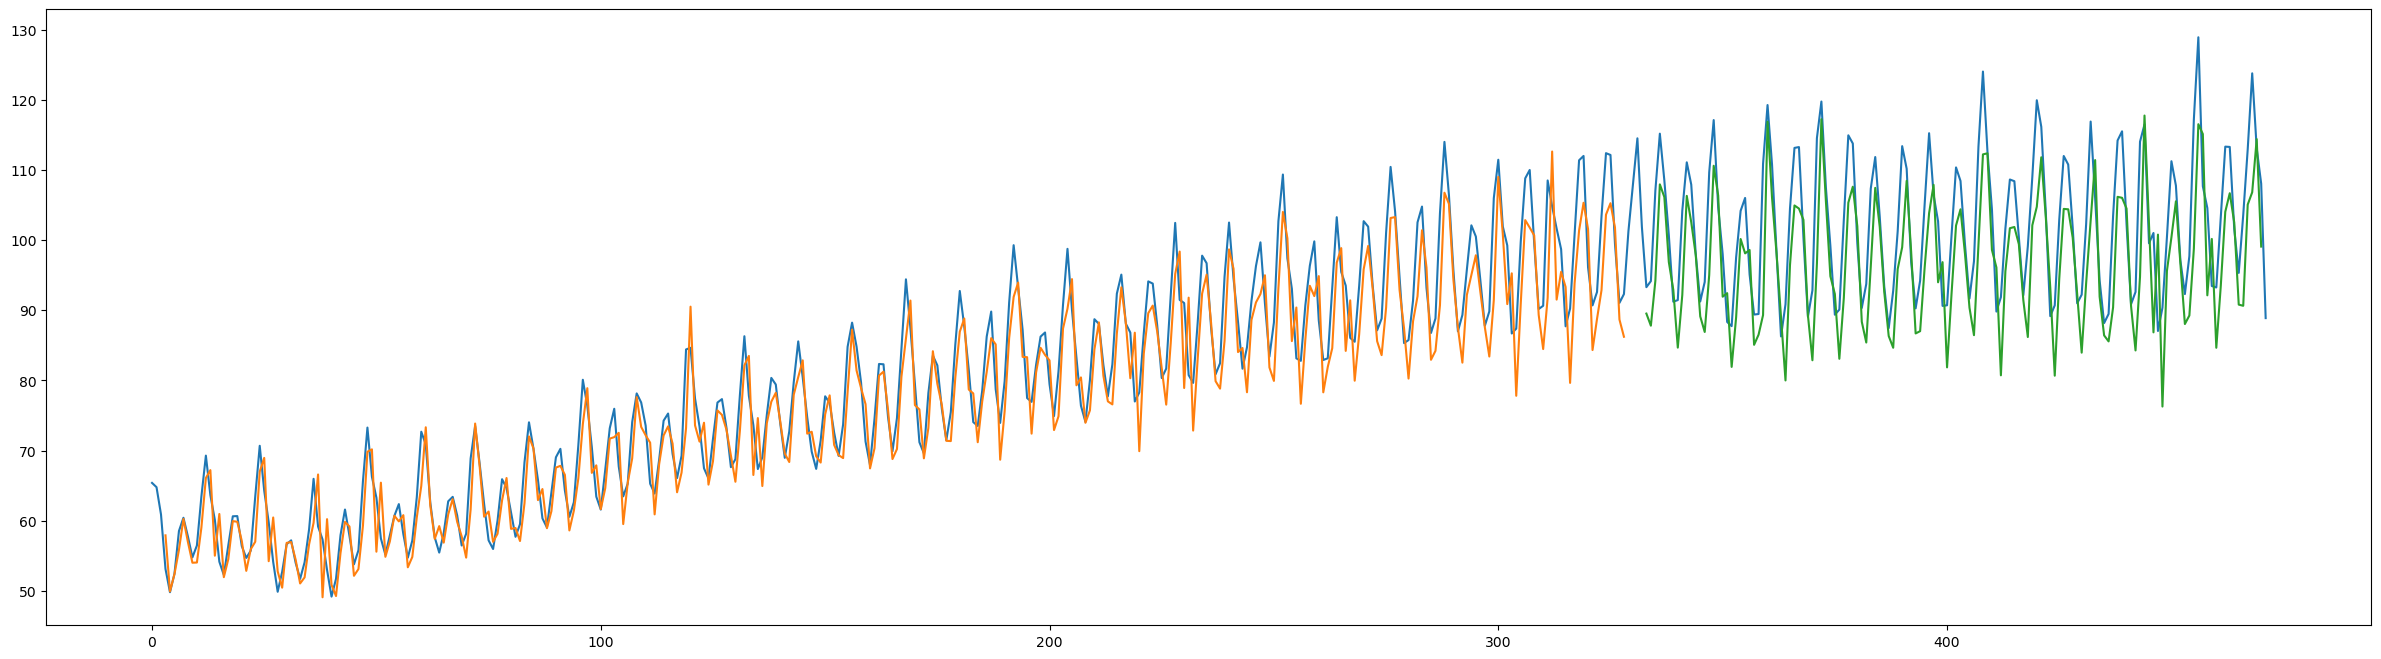

In [31]:
# Plota o dataset, as predições sobre o conjunto de treinamento e teste
plt.figure(figsize=(30,8))
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()